<a href="https://colab.research.google.com/github/LohitSubodh/Edgistify/blob/master/lab_3a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  Lab 3(a) - Implementation of Multi layer perceptron from scratch
##  Weightage - 2.4%

Maximum Points in the Lab: 90

---
Important points to remember :


1.  Observations for the experiments should be explained.
2. All the code should be submitted in the form of a single Jupyter notebook itself.
3. Points for each sub-section are mentioned in the appropriate question.
4. Make sure to begin early as a few experiments may consume more time to run.
5. You can use Google colab to run in jupyter notebook (https://colab.research.google.com/) How to load data in Google Colab ?(https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92)
6. The lab must be submitted on Google classroom. The code as well as the accompanying observations should be made part of the python notebook.
7. **Code Readability** is very important. Hence use self explanatory variable names and add comments to describe your approach wherever necessary.
8. You are expected to submit your **detailed inferences** and not just an error free code.
9. The lab is due on **March 20th 11.59pm**.
10. The lab should be completed **individually**. Students are expected to follow the **honor code** of the class.

For any doubts regarding lab please mail to 2018csm1011@iitrpr.ac.in


Below is the multi layer perceptron architechture used for implementation. Notations of the neural network are mentioned below :

![MLP implementation diagram](pictures/mlp.png)


## Implementation details :

1) In this lab you will be using MLP for classifying MNIST digits. a. Let us consider a MLP network with H hidden units, O outputs, and
inputs of size D.

2) According to above diagram dimensions of network will be :
```
 W - H * D+1   -- Weights from Input layer to Hidden layer
 V - K * H+1   -- Weights from Hidden layer to Output layer
 X - N * D+1   -- Weights of Input data
 Y - N * K     -- Weights of Output label data
 Z - H+1 * 1   -- Hidden layer Weights
 O - K * 1     -- Output layer weights
```
3) Please note that +1 in above notations is to indicate bias term.

4) tanh is used as the activation function.

5) During forward pass will be :

$\mathbf{z}=\tanh (\mathbf{W} \mathbf{x})$

and $O_{i}=\frac{\exp v_{i}^{T} z}{\sum_{k=1}^{K} \exp v_{k}^{T} z}$

Overall loss function will be :

Total loss = $-\sum_{n=1}^{N} \sum_{i=1}^{K} y_{n i} \log O_{n i}$




6) The dataset is included in zip file ("data.txt" and "label.txt"). Number of hidden layer units to be 500, learning rate is set to be 0.01. 

7) Inorder to update the weights during back propogation we will modified version of stochastic gradient descent, where instead of updating weights after each data point, the updates are made once with batch of input data, Let batch size = 25. Number of epochs = 100.

8) Divide the data into train, validation, and test splits using a preset ratio. Please define the ratio you are using.

9) Please plot the below : 

    i)  Training error, Validation error Vs epochs [average over 5 runs.]
  
    ii) Mean Training error Vs epochs [average over 5 runs.]
    
    iii)  Mean Validation error Vs epochs [average over 5 runs.]
  
    iv) Variance Training error Vs epochs [average over 5 runs.]
    
     v)  Variance validation error Vs epochs [average over 5 runs.]


# Note : 

1) All weight update equations during back propogation should be done using $\textbf{Matrix operations}$ only (not for loops).

 For example : 
 
![MLP implementation diagram](pictures/equation.png)





# Maximum points : 90 points.

1) Derive the weight update equation for W in form of Matrix operations similar to V matrix operations defined above.(write in the jupyter notebook itself using Latex or image) - 10 pts

2) Splitting train, validation and test using preset ratio - 5 pts

3) Random weights assign to W,V values -  5 pts.

4) During Forward pass :
   
       updating Z values - 5 pts.

       updating O values - 5 pts.

       Applying softmax values - 5pts.

       Calculating error values - 5pts.

5) During backward pass : ( only matrix operations allowed)
   
       Gradient between hidden to output - 10 pts.

       Gradient betweem input to hidden - 15 pts.
   
6) Using batch size = 25 to update weights - 5 pts.

7) averaging over 5 runs - 5 pts.

8) Please plot the below : - 10pts. 

    i)  Training error, Validation error Vs epochs [average over 5 runs.]
  
    ii) Mean Training error Vs epochs [average over 5 runs.]
    
    iii)  Mean Validation error Vs epochs [average over 5 runs.]
  
    iv) Variance Training error Vs epochs [average over 5 runs.]
    
     v)  Variance validation error Vs epochs [average over 5 runs.]   
     
9) Discuss the observations from above plots. - 5pts.

![Derivation of Weight update for W](https://drive.google.com/uc?id=11Y0ZIU7MUsG8wwpiZ-4rpdAV_ISoCKqu)






In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import pandas as pd
data=pd.read_csv('/content/drive/My Drive/lab3/lab3/data.txt')
label=pd.read_csv('/content/drive/My Drive/lab3/lab3/label.txt')

Streaming output truncated to the last 5000 lines.
  -0.91997675]
 [-0.05819435  0.07961128 -0.03746637 ...  0.06221968 -0.13215363
   0.10904262]
 [ 0.07722234  0.02183287 -0.12693085 ...  0.05463874  0.02023415
   1.04220004]]
(10, 501)
(500, 401)
[[ 0.0485927  -0.03273984 -0.03053789 ... -0.06518777  0.00255126
   0.17309101]
 [ 0.10613758  0.01579286 -0.0895017  ... -0.00320162 -0.01098679
   2.1652663 ]
 [-0.00905467 -0.01854078  0.03830177 ...  0.03978686  0.07881069
  -0.71126641]
 ...
 [-0.04068816 -0.00699928 -0.04199857 ... -0.01579617 -0.02176682
  -0.92001258]
 [-0.05819435  0.07961128 -0.03746637 ...  0.06221968 -0.13215363
   0.10905329]
 [ 0.07722234  0.02183287 -0.12693085 ...  0.05463874  0.02023415
   1.04243961]]
(10, 501)
(500, 401)
[[ 0.0485927  -0.03273984 -0.03053789 ... -0.06518777  0.00255126
   0.17309407]
 [ 0.10613758  0.01579286 -0.0895017  ... -0.00320162 -0.01098679
   2.16548718]
 [-0.00905467 -0.01854078  0.03830177 ...  0.03978686  0.07881069
  -0.7113

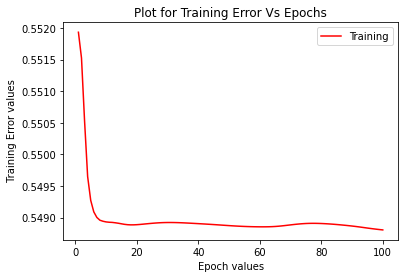

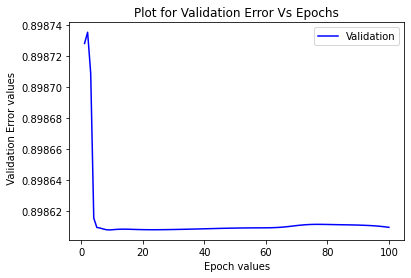

Plots are started to Generate In Figures Folder : 


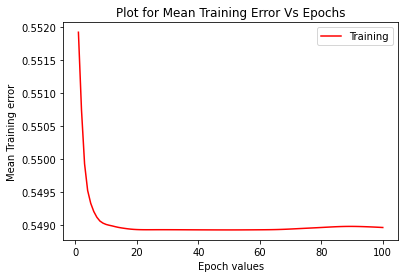

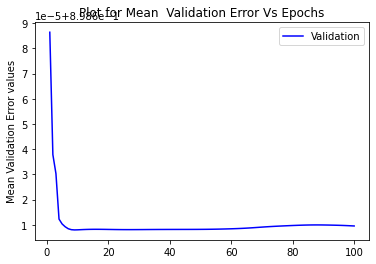

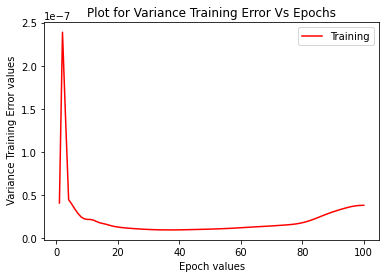

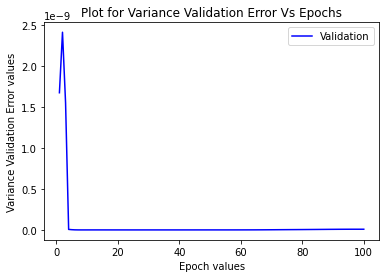



Plots are Generated Successfully In Figures folder


In [8]:
import matplotlib.pyplot as plt
import numpy as np
import random
import torch
import tensorflow as tf

####################################################################################
# Derivative of weights as defined in Lab3.a	####################################
####################################################################################
####################################################################################




# Dimension of all the Matrices Used
# W - H * D+1   -- Weights from Input layer to Hidden layer
# V - K * H+1   -- Weights from Hidden layer to Output layer
# X - N * D+1   -- Weights of Input data
# Y - N * K     -- Weights of Output label data
# Z - H+1 * 1   -- Hidden layer Weights
# O - K * 1     -- Output layer weights


# Function to read data and store it in form of 2D array
def read_data(file_name) :
    data = np.loadtxt(file_name, delimiter=',')
    return data


# Implementation of Forward pass function
def forward_pass(data_points,W,V,Y) :
    # use compute_Z_values, compute_O_values, compute_softmax, calculate_error to compute error, O_softmax
    # During forward pass compute Z values, O_values, O_softmax, error
    # Insert code here
    z_values=compute_Z_values(W,data_points)
    O_values=compute_O_values(V,z_values)
    O_softmax=compute_softmax(O_values)
    error=calculate_error(O_softmax,Y, 1e-10)
    #print("O_softmax shape :",O_softmax.shape)
    #return the error, O_softmax
    return error,O_softmax


# Implementation of Cross Entropy Error Function takes as input O_softmax, Y
def calculate_error(predictions, targets, epsilon=1e-10):
    # Caculate cross entropy error between output of softmax (predictions) , actual values (targets)
    #Insert code here
    logprobs =targets* np.log(predictions + epsilon)
    cross_entropy_error = - np.mean((np.mean(logprobs)))

    #returns cross entropy error
    return cross_entropy_error


# Implementation of Softmax Error Function takes as input O
def compute_softmax(output_matrix) :
    # return output_matrix after apply softmax function ( hint: use np.exp function )
    y_length = 10
    #output_matrix
    #Insert code here
    output_matrix= np.exp(output_matrix)/(np.sum(np.exp(output_matrix)))

    # returns output_matrix
    return output_matrix


# Implementation of Backward pass using Backpropagation Algorithm to calculate V_new, W_new, bias_v
def backward_pass(O_softmax,Y,V,Z,W,X,bias_z):
    # use gradient_hidden_to_output, gradient_input_to_hidden functions to compute V_new, bias_v, W_new 
    #Insert code here
    #dZ2 = A2 - Y
    #dW2 = (1 / m) * np.dot(dZ2, A1.T)
    #db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
    W_new=gradient_input_to_hidden(O_softmax,Y,V,Z,X)
    V_new,bias_v=gradient_hidden_to_output(O_softmax,Y,Z,bias_z)
    #print("V shape :",V_new.shape)
    #print("bias_v shape: ",bias_v.shape)
    #print(dW1.shape)
    #print(W.shape)
    #W_new = W - 0.01 * dW1
    #b1 = b1 - 0.01 * db1
    #V_new = V - 0.01 * dW2
    #bias_v = bias_z - 0.01 * db2
    #returns V_new, W_new, bias_v
    return  W_new,V_new,bias_v


#Implementation of Graident back propogation from Hidden to Input Layer
def gradient_hidden_to_output(O_softmax,Y,Z,bias_z) :
    # function to update V values using backpropogation using matrix operations.
    #Insert code here
    error=(O_softmax-Y).T
    #Z_T=Z.transpose()
    #K=Z
    #K=K.T
    Z=np.delete(Z,-1,0)
    #one_error=error[:, [0]]
    final_result_matrix= (1. / 25)* np.dot(Z,error.T)
    final_result_matrix=final_result_matrix.T
    bias_v = (1. / 25) * np.sum(error, axis=1, keepdims=True)
    # dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(A1, 2))
    #dW1 = (1 / m) * np.dot(dZ1, X.T)
    #db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
    #print("final v shape :",final_result_matrix.shape)
    #print(" bias_v shape :",bias_v.shape)
    return final_result_matrix,bias_v

#Implementation of Graident back propogation from Input to Hidden Layer
def gradient_input_to_hidden(O_softmax,Y,V,Z,X) :
    # function to update W values using backpropogation using only matrix operations.
    #Insert code here
    V=np.delete(V,-1,1)
    #print("V shape :",V.shape)
    #print("Y shape :", Y.shape)
    
    dA1 = np.dot(V.T,(O_softmax-Y).T)
    #print("dA1 shape is :",dA1.shape)
    #print("X shape is :",X.shape)
    #dZ1=dA1*(1-np.square(np.tanh(Z)))
    #dZ1 = dA1 * (1-tf.nn.tanh(Z, name ='tanh') **2)
    result_matrix = (1. / 25) * np.dot(dA1, X)
    #result_matrix=result_matrix.reshape(500,401)
    #print("W final shape :",result_matrix.shape)
    # returns updated W values
    return result_matrix



# Function to calculate Z values during forward pass
def compute_Z_values(weights,data_points) :
    # function to update Z during forward pass using matrix operations.
    #Insert code here
    
    
    Zh = np.dot( weights,data_points.T)
    
    z_values=np.tanh(Zh)
    x,y=z_values.shape
    bias=np.ones(y,dtype=int)
    z_values=np.vstack([z_values,bias])
    
    #return calculated z_values
    return z_values


# Function to Calculate output matrix during forward pass
def compute_O_values(weights,z_values) :
    # function to update O during forward pass using matrix operations.
    #Insert code here
    #print(weights.shape)
    #print(z_values.shape)
    #x,y=z_values.shape
    #final_data = np.ones((x+1,y))
    #final_data[:-1,:] = z_values
    #z_values=final_data
    #print(z_values.shape)
    o_values = np.exp(np.dot(weights,z_values))/(np.sum(np.exp(np.dot(weights,z_values))))
    #print("o values shape:",o_values.shape)
    #return calculated o_values
    return o_values.T



# Function to Intialise weights with bias term
def initilaise_weights(data) :
    # function to append bias term.
    # insert code here
    #final_data=torch.nn.init.xavier_uniform(data)
    #final_data.bias.data.fill_(0.01)
    #final_data= np.concatenate((data,   [1]) )
    x,y=data.shape
    final_data = np.ones((x,y+1))
    final_data[:,:-1] = data
    #print("final data shape :",final_data.shape)
    return final_data



# To intiliase random weights to Matrices such as W, V
def random_weights(number_of_rows,number_of_columns) :
    # Function to assign random weights to W, V
    #Insert code here 
    new_data = np.random.randn(number_of_rows, number_of_columns) *  np.sqrt(2.0/number_of_rows)
    #V = np.random.randn(HIDDEN_LAYER_SIZE, OUTPUT_LAYER_SIZE) * np.sqrt(2.0/HIDDEN_LAYER_SIZE)

    # return random weights with number_of_rows * number_of_columns
    return new_data


# To divide the data into test train data
def train_test_split(X,Y,fraction) :
    # Function to divide train, validation and test data based on fraction. let fraction = 0.8 then train = 0.75, validation= 0.05 and test = 0.2 
    #Insert code here 
    from sklearn.model_selection import train_test_split

    x, test_data_x, y, test_data_y = train_test_split(X,Y,test_size=1-fraction,train_size=fraction)
    data_train_x, validation_data_x, data_train_y, validation_data_y = train_test_split(x,y,test_size = (0.0625*fraction)/fraction,train_size =0.9375)

    # return data_train_x,data_train_y,validation_data_x,validation_data_y,test_data_x,test_data_y
    return data_train_x,data_train_y,validation_data_x,validation_data_y,test_data_x,test_data_y


# Shuffle in same order for X,Y
def shuffle(a, b, seed):
   # to Shuffle in same order for X,Y based on seed
   #Insert code here
   rand_state = np.random.RandomState(seed)
   rand_state.shuffle(a)
   rand_state.seed(seed)
   rand_state.shuffle(b)

   # return shuffled values a,b in same order
   return a,b


if __name__ == "__main__" :
    data = read_data("/content/drive/My Drive/lab3/lab3/data.txt")
    Y = read_data("/content/drive/My Drive/lab3/lab3/label.txt")
    X = initilaise_weights(data)
    W = random_weights(500,401)
    V = random_weights(10,501)
    #X = np.array(X)
    Z = compute_Z_values(W,X[:25,:])
    O = compute_O_values(V,Z)
    bias_z = np.empty(shape=(25, 1))
    bias_z.fill(1.0)
    i=0
    learning_rate = 0.01
    train_test_fraction  = 0.8
    train_validation_split = 0.2
    train_data_x,train_data_y,validation_data_x,validation_data_y,test_data_x,test_data_y =train_test_split(X,Y,train_test_fraction)
    number_of_epocs=100
    train_error_epoch = []*(5*number_of_epocs)
    #X = train_data_x
    #Y = train_data_y
    #Dividing the data into training data and test data into 0.8 ratio same ration for train and validation data,values below correspond to 0.8 ratio
    train_data_len = 3200
    validation_data_len = 800
    test_data_len =1000
    validation_error_epoch = [] * (5*number_of_epocs)
    # Running for 5 trails using 100 Epocs and Batch size = 25
    batch_size = 25
    print("Started calculating Training error in 5 Trails for each epoch with Batch size = 25 ")
    print("Started calculating Validation error in 5 Trails for each epoch with Batch size = 25 ")
    # Different trails are performed for 5 times.
    # 5 different trails
    for k in range(5) :
        W = random_weights(500, 401)
        V = random_weights(10, 501)
        error_train=0
        error_validation = 0
        # Randomising the data
        seed = random.randint(10000,10000000)
        X,Y = shuffle(X,Y,seed)
        print("Training Error for 100th epoch for Trail Number : "+str(k+1))
        for j in range(number_of_epocs) :
            i=0
            count=0
            error_train = 0.0
            error_validation = 0.0
            #X,Y = shuffle(X,Y,12345)
            while i < (train_data_len)  :
                i1=i
                # Batch size is 25
                i= i+25
                error,O_softmax=forward_pass(X[i1:i, :], W, V, Y[i1:i, :])
                W_new,V_new,bias_v=backward_pass(O_softmax,Y[i1:i,:],V,Z,W,X[i1:i,:],bias_z)
                print(W_new.shape)
                
                W = W - (learning_rate/25)*W_new
                print(W)
                V_new = np.append(learning_rate*bias_v,V_new,axis=1)
                V = V - (learning_rate/25)*V_new
                error_train+= error
                count+=1
                #print(error1)
                print(V.shape)
            print(error)
            print(j)
            error, O_softmax = forward_pass(X[0:3200, :], W, V, Y[0 : 3200, :])
            error1, O_softmax = forward_pass(X[3200:4000, :], W, V, Y[3200:4000, :])
            error_validation = error1
            count = train_data_len/batch_size
            count1= validation_data_len/batch_size
            error_train = error_train/count
            print("Training error after  epoch : "+str(j+1)+" here every batch size = 25")
            print(error_train)
            print("Validation error after  epoch : "+str(j+1)+" here batch size = 25")
            print(error_validation)
            train_error_epoch.append(error_train)
            validation_error_epoch.append(error_validation)
    print("\n")
    print("Final Training Errors after 5 trails and 100 Epocs : ")
    print(train_error_epoch)
    print("\n")
    print("Final Validation Errors after 5 trails and 100 Epocs : ")
    print(validation_error_epoch)
    
    #location= "/content/drive/My Drive/lab3/lab3/figures/lab3.a_MeanTrainingError" + ".png"
    #location = "./figures/lab3.a_MeanTrainingError" + ".png"
    
    #plt.savefig(location)
    #plt.close()

    mean_training = []
    variance_training = []
    mean_validation = []
    variance_validation = []
    training_error=[]
    validation_error=[]
    train_error_epoch = np.reshape(train_error_epoch,(5,number_of_epocs))
    validation_error_epoch = np.reshape(validation_error_epoch,(5,number_of_epocs))
     
    training_error=train_error_epoch[0]
    validation_error=validation_error_epoch[0]
    training_error = np.reshape(training_error,(number_of_epocs,))
    validation_error = np.reshape(validation_error, (number_of_epocs))

    mean_training = np.mean(train_error_epoch, axis=0)
    mean_validation = np.mean(validation_error_epoch,axis=0)
    variance_training = np.var(train_error_epoch,axis=0)
    variance_validation = np.var(validation_error_epoch,axis=0)
    mean_training = np.reshape(mean_training,(number_of_epocs,))
    mean_validation = np.reshape(mean_validation, (number_of_epocs))
    variance_training = np.reshape(variance_training,(number_of_epocs,))
    variance_validation = np.reshape(variance_validation,(number_of_epocs,))
    epochs = []
    for i in range(1,number_of_epocs+1) :
        epochs.append(i)
    print("\n")

    
    #train_error_epoch = np.reshape(train_error_epoch,(number_of_epocs,))
    #validation_error_epoch = np.reshape(validation_error_epoch, (number_of_epocs))

    plt.plot(epochs, training_error, color='red', label='Training')
    plt.xlabel("Epoch values")
    plt.ylabel(" Training Error values")
    plt.title("Plot for Training Error Vs Epochs")
    plt.legend(loc='best')
    plt.show()

    plt.plot(epochs,validation_error, color='blue', label='Validation')
    plt.xlabel("Epoch values")
    plt.ylabel("  Validation Error values")
    plt.title("Plot for Validation Error Vs Epochs")
    plt.legend(loc='best')
    plt.show()    
    
    

    print("Plots are started to Generate In Figures Folder : ")
    plt.plot(epochs,mean_training, color='red', label='Training')
    plt.xlabel("Epoch values")
    plt.ylabel("Mean Training error")
    plt.title("Plot for Mean Training Error Vs Epochs")
    plt.legend(loc='best')
    plt.show()

    #location= "/content/drive/My Drive/lab3/lab3/figures/lab3.a_TrainingError" + ".png"
    #location = "./figures/lab3.a_TrainingError" + ".png"
    #plt.savefig(location)
    #plt.close()

    plt.plot(epochs, mean_validation,color='blue', label='Validation')
    plt.ylabel("Mean Validation Error values")
    plt.title("Plot for Mean  Validation Error Vs Epochs")
    plt.legend(loc='best')
    plt.show()

    #location= "/content/drive/My Drive/lab3/lab3/figures/lab3.a_TrainingAndValidationError" + ".png"
    #location = "./figures/lab3.a_TrainingAndValidationError" + ".png"
    #plt.savefig(location)
    #plt.close()

    #plt.ylim(0.0145,0.01465)
    #plt.plot(epochs, mean_training, color='red', label='Training')
    #plt.plot(epochs, mean_validation, color='blue', label='Validation')
    #plt.xlabel("Epoch values")
    #plt.ylabel("Mean Training Error values")
    #plt.title("Plot for Mean Training Error Vs Epochs")
    #plt.show()
    #location= "/content/drive/My Drive/lab3/lab3/figures/lab3.a_MeanTrainingError" + ".png"
    #location = "./figures/lab3.a_MeanTrainingError" + ".png"
    #plt.legend(loc='best')
    #plt.savefig(location)
    #plt.close()
    #plt.ylim(0.0133, 0.134)
    #plt.plot(epochs, mean_validation, color='blue', label='Validation')
    #plt.xlabel("Epoch values")
    #plt.ylabel(" Mean Validation Error values")
    #plt.title("Plot for Mean Validation Error Vs Epochs")
    #location= "/content/drive/My Drive/lab3/lab3/figures/lab3.a_MeanValidationError" + ".png"
    #location = "./figures/lab3.a_MeanValidationError" + ".png"
    #plt.legend(loc='best')
    #plt.savefig(location)
    #plt.close()
    #plt.ylim(0.000240, 0.000242)

    plt.plot(epochs, variance_training, color='red', label='Training')
    plt.xlabel("Epoch values")
    plt.ylabel(" Variance Training Error values")
    plt.title("Plot for Variance Training Error Vs Epochs")
    plt.legend(loc='best')
    plt.show()

    #location= "/content/drive/My Drive/lab3/lab3/figures/lab3.a_VarianceTrainingError" + ".png"
    #location = "./figures/lab3.a_VarianceTrainingError" + ".png"
    
    #plt.savefig(location)
    #plt.close()
    #plt.ylim(0.000210, 0.000211)

    plt.plot(epochs, variance_validation, color='blue', label='Validation')
    plt.xlabel("Epoch values")
    plt.ylabel("Variance Validation Error values")
    plt.title("Plot for Variance Validation Error Vs Epochs")
    plt.legend(loc='best')
    plt.show()
    
    #location= "/content/drive/My Drive/lab3/lab3/figures/lab3.a_VarianceValidationError" + ".png"
    #location = "./figures/lab3.a_VarianceValidationError" + ".png"
    
    #plt.savefig(location)
    #plt.close()
    print("\n")
    print("Plots are Generated Successfully In Figures folder")

